<a href="https://colab.research.google.com/github/Carlos-Ivan-Hernandez-Lopez/Simulacion-II/blob/main/Examen1/Problema4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instituto Politécnico Nacional 

Escuela superior de física y matemáticas

Simulación II

Primer examen parcial.

Carlos Iván Hernández López

# 18. Sean cuatro variables aleatorias indepedientes $ξ_i$,todas con distribución de Poisson con media igual $1/2$. 
Determínese $P(τ\leq1)$ siendo
$$τ=\frac{\xi_1+\xi_2+\xi_3+\xi_4}{4}$$

## Solución por simulación
Usamos el metodo de la simulación

### Paso 1: Define las variables
Como el problema lo indica ocuparemos cuatro variables
$\xi_i$ con $i=1,2,3,4$

### Paso 2 y 3: Defina la distribución de probabilidad y modele las variables aleatorias
Como el problema lo indica las variables son identicamente distribuidas Poisson con media $1/2$

$$\xi_i\sim PS(1/2)$$
$$i=1,2,3,4$$

### Paso 4: Defina el modelo del sistema y los objetivos de la simulación.

El modelo sera el plasmado en el problema
$$τ=\frac{\xi_1+\xi_2+\xi_3+\xi_4}{4}<1$$

El objetivo de la simulación sera determinar la probabilidad de que se cumpla el modelo.

In [ ]:
# Se importan las librerias que usaremos.
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math 
from scipy.stats import poisson

In [ ]:
def tau(): #Esta funcion genera cuatro números aleatoriaos con distribucion de Poisson y devuelve el valor de tau
  xi1=poisson.rvs(1/2)
  xi2=poisson.rvs(1/2)
  xi3=poisson.rvs(1/2)
  xi4=poisson.rvs(1/2)
  t=(xi1+xi2+xi3+xi4)/4
  return t

In [ ]:
tau()

0.0

### Paso 5: Diseñe el experimento.
Para determinar la probabilidad correremos n veces `tau` y compararemos si el resultado es menor a 1, de esta froma guardaremos los exitos y los dividiremos entre el número de corridas realizadas a cada paso.



In [ ]:
def exito(n): #Con esta funcion se guardan las probabilidades acumuladas de que se cumpla con la condicion del problema.
  ex=0
  Prob=[]
  for i in range(n):
    tau()
    if tau()<1:
      ex+=1
      Prob.append(ex/(i+1))
  return Prob

0.8548486553531914 0.013897233041669833


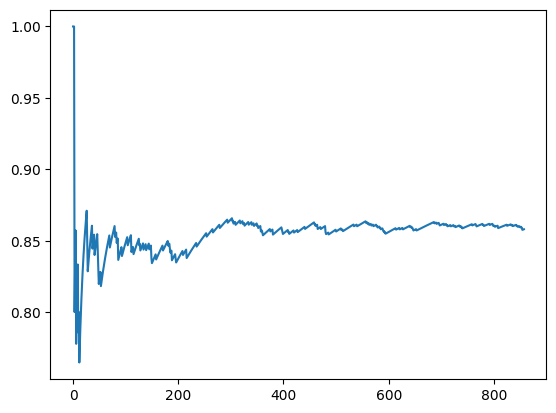

In [ ]:
x=exito(1000)
plt.plot(x)
Media=np.mean(x)
DesEst=np.std(x)
print(Media,DesEst)

### Paso 6: Repita el experimento $N$ veces
Encontramos $N$ por medio del teorema central del limite.

In [ ]:
N=math.ceil((2*DesEst*1.96/0.01)**2) #El teorema central del limite nos dara una aproximacion a la cantidad de reprticiones que se requieren para que el experimento
print(N)                  #regrese resultados confiables.

30


In [ ]:
def rep(j):
  lista=[]
  for i in range(j):
    r=exito(1000)
    lista.append(np.mean(r))
  return lista

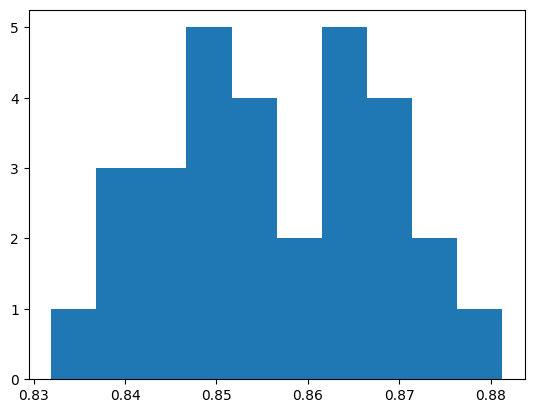

In [ ]:
Y=rep(N)
plt.hist(Y)
plt.show()

In [ ]:
X=np.mean(Y)
s=np.std(Y)
print(X,s)

0.8565120888469478 0.012173393538925515


### Paso 7. Obtener el intervalo de confianza.
Para obtener el intervalo de confianza usaremos
$$\bar{x}-z_{α/2}*s/\sqrt{n}<μ<\bar{x}+z_{α/2}*s/\sqrt{n}$$
con un nivel de confianza del 95%

In [ ]:
li=X-(1.96*s/np.sqrt(N)) #Se calculan los limites con los parametros que tenemos.
ls=X+(1.96*s/np.sqrt(N))
print('El intervalo de confianza es:[', li, ',', ls, ']')

El intervalo de confianza es:[ 0.8521558959150786 , 0.8608682817788171 ]


## Solución análitica.
Buscamos
$$P(τ<1)$$
con
$$τ=\frac{\xi_1+\xi_2+\xi_3+\xi_4}{4}$$

De otra forma podemos ver que buscamos
$$P\left(\frac{\xi_1+\xi_2+\xi_3+\xi_4}{4}< 1 \right)$$
$$=P(\xi_1+\xi_2+\xi_3+\xi_4< 4)$$
Se establece en el problema que 
$$\xi_i\sim PO(1/2) ... i=1,2,3,4.$$
Sabemos que la suma de variables independientes con distribución Poisson es otra variable con distribución Poisson y parametro la suma de los parametros, por lo que
$$X=\xi_1+\xi_2+\xi_3+\xi_4 \sim PO(1/2+1/2+1/2+1/2)$$
$$X\sim PO(2)$$
ahora buscamos

$$P(X< 4)$$
Recordando que la distribución de Poisson solo toma valores enteros prositivos y el cero, podemos ver
$$P(X< 4)=P(X=0)+P(X=1)+P(X=2)+P(X=3) $$
Resolvemos
$$P(X< 4)=\frac{e^{-2}*2^0}{0!}+\frac{e^{-2}*2^1}{1!}+\frac{e^{-2}*2^2}{2!}+\frac{e^{-2}*2^3}{3!}$$
$$=0.1353+0.2706+0.2706+0.1804$$
$$P(\tau< 1)=0.8569$$